In [105]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from bubbly.bubbly import bubbleplot 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
init_notebook_mode(connected=True)
import os
from PIL import Image

PATH = "C:/Users/envym/workplace/datathon"
print(os.listdir(PATH))

['athlete_events.csv', 'athlets_per_olympic_game(bar).png', 'athlets_per_olympic_game(box).png', 'athlets_per_olympic_game(scat).png', 'athlets_per_olympic_game2(bar).png', 'athlets_per_olympic_game2(scat).png', 'datathon.ipynb', 'datathon1.ipynb', 'noc_regions.csv', 'result', 'sports_per_olympic_edition(bar).png']


In [106]:
# 파일 저장
athlete_events_df = pd.read_csv(PATH+"/athlete_events.csv")
noc_regions_df = pd.read_csv(PATH+"/noc_regions.csv")

In [107]:
# data 형태 
print("Athletes and Events data -  rows:",athlete_events_df.shape[0]," columns:", athlete_events_df.shape[1])
print("NOC Regions data -  rows:",noc_regions_df.shape[0]," columns:", noc_regions_df.shape[1])

Athletes and Events data -  rows: 271116  columns: 15
NOC Regions data -  rows: 230  columns: 3


In [108]:
athlete_events_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [109]:
noc_regions_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [110]:
# Athlete 누락 데이터 확인
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(athlete_events_df)

,Total,Percent
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
ID,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Team,0,0.000000
NOC,0,0.000000
Games,0,0.000000


In [111]:
# NOC의 누락 데이터를 살펴보자
missing_data(noc_regions_df)

,Total,Percent
notes,209,90.869565
region,3,1.304348
NOC,0,0.000000


In [112]:
#개최연도 도시 동계 하계를 구분해보자
tmp = athlete_events_df.groupby(['Year', 'City'])['Season'].value_counts()
df = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()

In [113]:
# 샘플 다섯개 보기
df.head(5)

,Year,City,Season,Athlets
0,1896,Athina,Summer,380
1,1900,Paris,Summer,1936
2,1904,St. Louis,Summer,1301
3,1906,Athina,Summer,1733
4,1908,London,Summer,3101


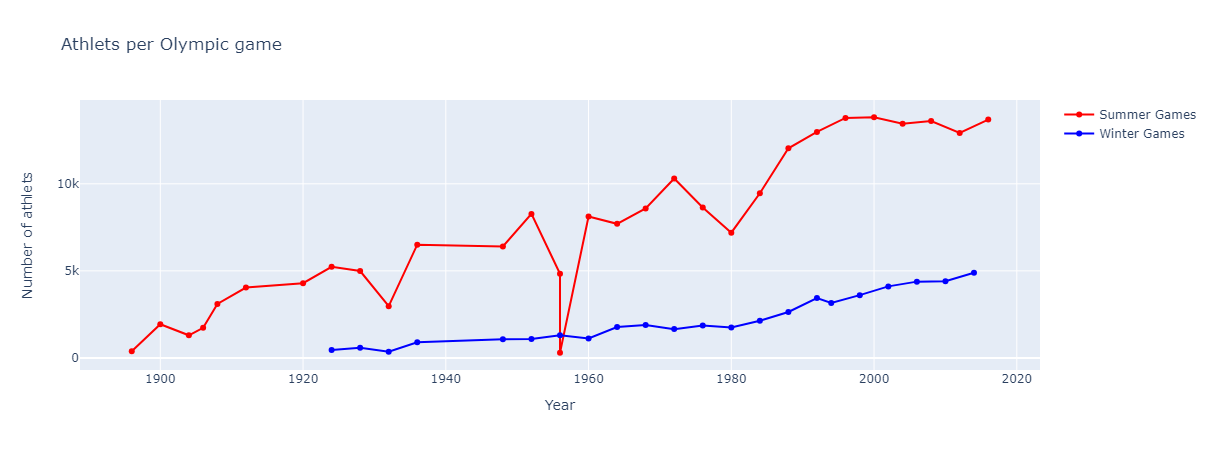

In [114]:
# 연도별 동계하계 올림픽 선수 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines"
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines"
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets2')

img = Image.open('athlets_per_olympic_game(scat).png')
display(img)


In [115]:
traceS = go.Scatter(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    mode = "markers+lines",
    text=dfS['City'],
)
traceW = go.Scatter(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    mode = "markers+lines",
    text=dfW['City']
)

data = [traceS, traceW]

fig = make_subplots(rows=1, cols=2, subplot_titles=('Number athlets: Summer Games', 'Number athlets: Winter Games'))
fig.append_trace(traceS, 1, 1)
fig.append_trace(traceW, 1, 2)

iplot(fig, filename='events-athlets2')


In [116]:
#막대 그래프 만들기, 도시 추가
tmp = athlete_events_df.groupby('Year')['City'].value_counts()
df2 = pd.DataFrame(data={'Athlets': tmp.values}, index=tmp.index).reset_index()
df2 = df2.merge(df)

In [117]:
iplot(ff.create_table(df2.head(3)), filename='jupyter-table2')

In [118]:
# 막대그래프 생성 커서를 가져다대면 도시 표시
dfS = df2[df2['Season']=='Summer']; dfW = df2[df2['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
    marker=dict(color="Red"),
    text=dfS['City']
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(color="Blue"),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets3')

In [119]:
#막대 그래프 변형
traceS = go.Bar(
    x = dfS['Year'],y = dfS['Athlets'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City'],
    
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='black',
                    width=0.75),
                opacity=0.7,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of athlets'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets4')

In [120]:
#박스 그래프
traceS = go.Box(
    x = dfS['Athlets'],
    name="Summer Games",
    
     marker=dict(
                color='rgba(238,23,11,0.5)',
                line=dict(
                    color='red',
                    width=1.2),
            ),
    text=dfS['City'],
    orientation='h',
    
)
traceW = go.Box(
    x = dfW['Athlets'],
    name="Winter Games",
    marker=dict(
                color='rgba(11,23,245,0.5)',
                line=dict(
                    color='blue',
                    width=1.2),
            ),
    text=dfS['City'],  orientation='h',
)

data = [traceS, traceW]
layout = dict(title = 'Athlets per Olympic game',
          xaxis = dict(title = 'Number of athlets',showticklabels=True),
          yaxis = dict(title = 'Season', showticklabels=True, tickangle=-90), 
          hovermode = 'closest',
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-athlets5')

In [121]:
#종목을 살펴보자
tmp = athlete_events_df.groupby(['Year', 'City','Season'])['Sport'].nunique()
df = pd.DataFrame(data={'Sports': tmp.values}, index=tmp.index).reset_index()

In [122]:
# 샘플
df.head(3)

,Year,City,Season,Sports
0,1896,Athina,Summer,9
1,1900,Paris,Summer,20
2,1904,St. Louis,Summer,18


In [123]:
# 동계하계올림픽 종목 수
dfS = df[df['Season']=='Summer']; dfW = df[df['Season']=='Winter']

traceS = go.Bar(
    x = dfS['Year'],y = dfS['Sports'],
    name="Summer Games",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= dfS['City'],
)
traceW = go.Bar(
    x = dfW['Year'],y = dfW['Sports'],
    name="Winter Games",
    marker=dict(
                color='rgb(11,23,245)',
                line=dict(
                    color='blue',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['City']
)

data = [traceS, traceW]
layout = dict(title = 'Sports per Olympic edition',
          xaxis = dict(title = 'Year', showticklabels=True), 
          yaxis = dict(title = 'Number of sports'),
          hovermode = 'closest',
          barmode='stack'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='events-sports1')